In [843]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [844]:
train_data = pd.read_csv('train.csv')
real_test_data = pd.read_csv('test.csv')
test_data_passenger_id = real_test_data['PassengerId']

In [845]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploring the data

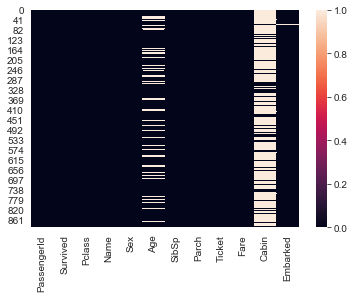

In [846]:
sns.heatmap(train_data.isnull())

age does not have a lot of missing data so we can probably replace that. Cabin has too much missing data.

C:\Users\LPras\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


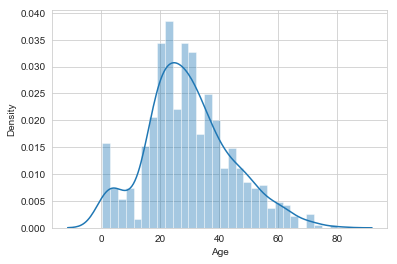

In [847]:
sns.distplot(train_data['Age'], bins=30)

quite a lot of young persons on board

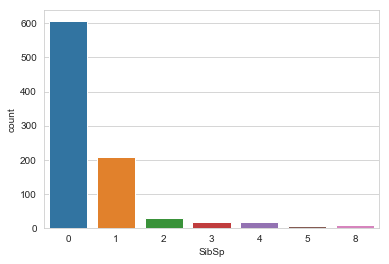

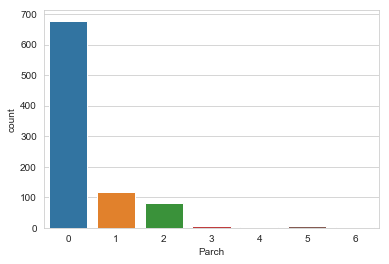

In [848]:
sns.countplot(x='SibSp',data=train_data)
plt.show()
sns.countplot(x='Parch',data=train_data)

a lot of people travelled without family

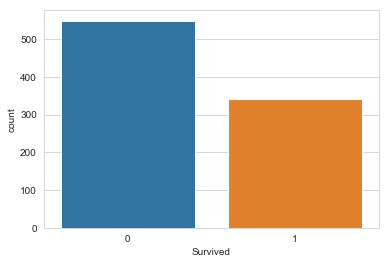

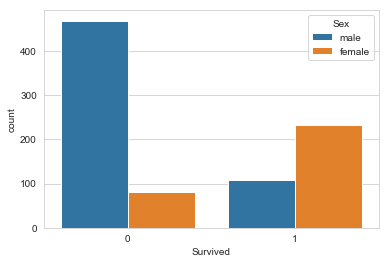

In [849]:
sns.countplot(x='Survived',data=train)
plt.show()
sns.countplot(x='Survived', hue='Sex', data=train)
plt.show()

women have survived more than man

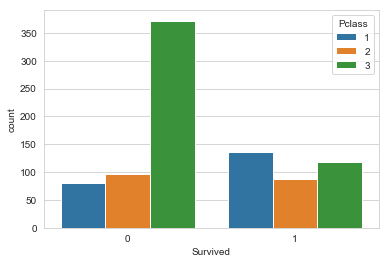

In [850]:
sns.countplot(x='Survived',hue='Pclass',data=train_data)

people in the first and second class survived a lot more than people in the third  lass

# Data cleaning

First we will remove the cabin column since there is too much missing data

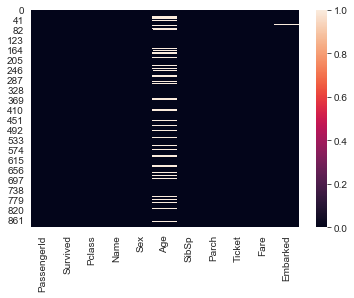

In [851]:
train_data = pd.read_csv('train.csv')
train_data.drop('Cabin',axis=1,inplace=True)
sns.heatmap(train_data.isnull())

#also do it for test data
real_test_data.drop('Cabin',axis=1,inplace=True)

We want to keep the age of the passengers in the data, so we could take the average of all the passengers to fill in the missing data. We could also look at the average age of the passengers per class, since we have seen earlier that the class in which the passengers were had a substantial influence on their survival rate.

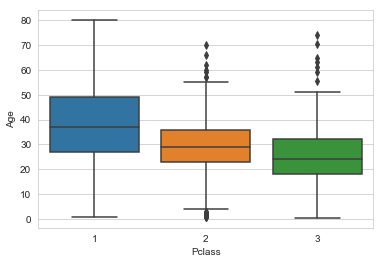

In [852]:
sns.boxplot(x='Pclass',y='Age',data=train_data)

We can see something in this which is quite logical and that is that the average age of the first class is higher than 
of the second and third class and of the second class is also higher than the third class. This is logical since older persons
are more likely to have more money.

In [853]:
age_1 = train_data[train_data['Pclass']==1]['Age'].dropna().mean()
age_2 = train_data[train_data['Pclass']==2]['Age'].dropna().mean()
age_3 = train_data[train_data['Pclass']==3]['Age'].dropna().mean()
print('average age class 1: ',age_1)
print('average age class 2: ',age_2)
print('average age class 3: ',age_3)


average age class 1:  38.233440860215055
average age class 2:  29.87763005780347
average age class 3:  25.14061971830986


We will fill in the missing ages with the averages per class

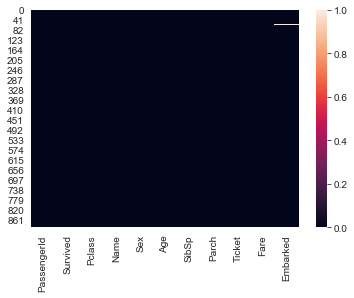

In [854]:
def fill_in_missing_age(columns):
    class_p = columns[0]
    age_p = columns[1]
    
    if pd.isnull(age_p):

        if class_p == 1:
            return np.round(age_1)

        elif class_p == 2:
            return np.round(age_2)

        else:
            return np.round(age_3)
    else:
        return age_p
    
train_data['Age'] = train_data[['Pclass','Age']].apply(fill_in_missing_age,axis=1)
sns.heatmap(train_data.isnull())

#also do it for test data
real_test_data['Age'] = real_test_data[['Pclass','Age']].apply(fill_in_missing_age,axis=1)

In [855]:
'officer = 1, royality = 2, Mrs = 3, Miss =4, Mr = 5, master=6'
Title_Dictionary = {
    "Capt": 'officer',
    "Col": 'officer',
    "Major": 'officer',
    "Jonkheer": 'royality',
    "Don": 'royality',
    "Sir" : 'royality',
    "Dr": 'officer',
    "Rev": 'officer',
    "the Countess":'royality',
    "Mme": 'Mrs',
    "Mlle": 'Miss',
    "Ms": 'Mrs',
    "Mr" : 'Mr',
    "Mrs" : 'Mrs',
    "Miss" : 'Miss',
    "Master" : 'Master',
    "Lady" : 'royality'
}

def get_titles():
    # we extract the title from each name
    train_data['Title'] = train_data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    real_test_data['Title'] = real_test_data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    train_data['Title'] = train_data.Title.map(Title_Dictionary)
    real_test_data['Title'] = real_test_data.Title.map(Title_Dictionary)
    
    
    return train_data, real_test_data
print(get_titles())

def process_names(train_data,real_test_data):
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(train_data['Title'], prefix='Title')
    titles_dummies2 = pd.get_dummies(real_test_data['Title'], prefix='Title')
    train_data = pd.concat([train_data, titles_dummies], axis=1)
    real_test_data = pd.concat([real_test_data, titles_dummies2], axis=1)
    
    #add column with 0 for Title_royality column since there are none in the test data
    real_test_data['Title_royality'] = 0
    
    train_data.drop('Title', axis=1, inplace=True)
    real_test_data.drop('Title', axis=1, inplace=True)

    return train_data, real_test_data

train_data, real_test_data = process_names(train_data, real_test_data)
train_data.head()

(     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25         

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_officer,Title_royality
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1,0,0,0


For machine learning algorithms we need to transform our categorical features to variables.

In [856]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Embarked        889 non-null    object 
 11  Title_Master    891 non-null    uint8  
 12  Title_Miss      891 non-null    uint8  
 13  Title_Mr        891 non-null    uint8  
 14  Title_Mrs       891 non-null    uint8  
 15  Title_officer   891 non-null    uint8  
 16  Title_royality  891 non-null    uint8  
dtypes: float64(2), int64(5), object(4),

Name, sex, ticket and embarked are all categorical features. We get dummy variables for sex and embark. We dont do this for 
the ticket and the name since they are all different (or almost all for names) for each passenger.

In [857]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)

#also do it for test data
sex_test = pd.get_dummies(real_test_data['Sex'],drop_first=True)
embark_test = pd.get_dummies(real_test_data['Embarked'],drop_first=True)

Now we remove all categorical features

In [858]:
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

#also do it for test data
real_test_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [859]:
train_data = pd.concat([train_data,sex,embark],axis=1)
train_data.drop('PassengerId', axis=1, inplace=True)

#also do it for test data
real_test_data = pd.concat([real_test_data,sex_test,embark_test],axis=1)
real_test_data.drop('PassengerId', axis=1, inplace=True)

Then we get the final dataframe

In [860]:
real_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    int64  
 1   Age             418 non-null    float64
 2   SibSp           418 non-null    int64  
 3   Parch           418 non-null    int64  
 4   Fare            417 non-null    float64
 5   Title_Master    418 non-null    uint8  
 6   Title_Miss      418 non-null    uint8  
 7   Title_Mr        418 non-null    uint8  
 8   Title_Mrs       418 non-null    uint8  
 9   Title_officer   418 non-null    uint8  
 10  Title_royality  418 non-null    int64  
 11  male            418 non-null    uint8  
 12  Q               418 non-null    uint8  
 13  S               418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(8)
memory usage: 23.0 KB


# Seperation of response variable and explanotory variable in train data

In [861]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_data.drop('Survived',axis=1), train_data['Survived'])

#survived_or_not = train_data['Survived']
#train_data_person = train_data.drop('Survived',axis=1)

In [862]:
#transform testdata
real_test_data['Fare'].mean()
real_test_data['Fare'].iloc[152] = real_test_data['Fare'].mean()

C:\Users\LPras\miniconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# Naive Bayes

In [863]:
from sklearn.naive_bayes import GaussianNB

In [864]:
NB = GaussianNB()

In [865]:
NB.fit(X_train, Y_train)

GaussianNB()

In [866]:
all_predictions = NB.predict(X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, all_predictions)
print(matrix)
from sklearn.metrics import classification_report
report = classification_report(Y_test, all_predictions)
print(report)

[[124  25]
 [ 16  58]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       149
           1       0.70      0.78      0.74        74

    accuracy                           0.82       223
   macro avg       0.79      0.81      0.80       223
weighted avg       0.82      0.82      0.82       223



In [867]:
#predictions for the test data
predictions4 = NB.predict(real_test_data)
d4 = {'PassengerId':test_data_passenger_id,'Survived': predictions4}
df4 = pd.DataFrame(data=d4)
df4.to_csv('NB.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 662 to 271
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          668 non-null    int64  
 1   Age             668 non-null    float64
 2   SibSp           668 non-null    int64  
 3   Parch           668 non-null    int64  
 4   Fare            668 non-null    float64
 5   Title_Master    668 non-null    uint8  
 6   Title_Miss      668 non-null    uint8  
 7   Title_Mr        668 non-null    uint8  
 8   Title_Mrs       668 non-null    uint8  
 9   Title_officer   668 non-null    uint8  
 10  Title_royality  668 non-null    uint8  
 11  male            668 non-null    uint8  
 12  Q               668 non-null    uint8  
 13  S               668 non-null    uint8  
dtypes: float64(2), int64(3), uint8(9)
memory usage: 37.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #

# Decision tree

In [868]:
from sklearn.tree import DecisionTreeClassifier

In [869]:
dtree = DecisionTreeClassifier()

In [870]:
dtree.fit(X_train, Y_train)


DecisionTreeClassifier()

In [871]:
all_predictions2 = dtree.predict(X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, all_predictions2)
print(matrix)
from sklearn.metrics import classification_report
report = classification_report(Y_test, all_predictions2)
print(report)

[[119  30]
 [ 14  60]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       149
           1       0.67      0.81      0.73        74

    accuracy                           0.80       223
   macro avg       0.78      0.80      0.79       223
weighted avg       0.82      0.80      0.81       223



In [872]:
predictions2 = dtree.predict(real_test_data)
d = {'PassengerId':test_data_passenger_id,'Survived': predictions2}
df = pd.DataFrame(data=d)
df.to_csv('Decision_tree.csv',index=False)

# Support vector machines

In [873]:
from sklearn.svm import SVC

In [874]:
SVC_model = SVC()

In [875]:
SVC_model.fit(X_train, Y_train)

SVC()

In [876]:
all_predictions3 = SVC_model.predict(X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, all_predictions3)
print(matrix)
from sklearn.metrics import classification_report
report = classification_report(Y_test, all_predictions3)
print(report)

[[135  14]
 [ 49  25]]
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       149
           1       0.64      0.34      0.44        74

    accuracy                           0.72       223
   macro avg       0.69      0.62      0.63       223
weighted avg       0.70      0.72      0.69       223



For SVC it is important to fine tune the parameters C and gamma. We can do this with grid search. With this we can try a lot of combination of the parameters to see which works best.

In [877]:
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf']} 

In [878]:
from sklearn.model_selection import GridSearchCV

In [879]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [880]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.664, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.634, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.657, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.602, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.594, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.634, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.737, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.722, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.687, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.754, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.761, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.692, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.722, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.739, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.669, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.707, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.672, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.739, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.799, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.692, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.4s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [881]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [882]:
all_predictions3 = grid.predict(X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, all_predictions3)
print(matrix)
from sklearn.metrics import classification_report
report = classification_report(Y_test, all_predictions3)
print(report)

#acc_logistic = round(grid.score(train_data_persons, survived_or_not) * 100, 2)
#acc_logistic

[[121  28]
 [ 14  60]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       149
           1       0.68      0.81      0.74        74

    accuracy                           0.81       223
   macro avg       0.79      0.81      0.80       223
weighted avg       0.83      0.81      0.82       223



In [883]:
predictions3 = grid.predict(real_test_data)
d2 = {'PassengerId':test_data_passenger_id,'Survived': predictions3}
df2 = pd.DataFrame(data=d2)
df2.to_csv('SVC.csv',index=False)

# Logistic regression

Now we are going to train our logistic regresion model with the train data to predict the test data

In [884]:
from sklearn.linear_model import LogisticRegression

In [885]:
logisticmodel = LogisticRegression(solver='liblinear')
logisticmodel.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [886]:
all_predictions = logisticmodel.predict(X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, all_predictions)
print(matrix)
from sklearn.metrics import classification_report
report = classification_report(Y_test, all_predictions)
print(report)

[[130  19]
 [ 17  57]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       149
           1       0.75      0.77      0.76        74

    accuracy                           0.84       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223



In [887]:
#predictions for the test data
predictions3 = logisticmodel.predict(real_test_data)
d3 = {'PassengerId':test_data_passenger_id,'Survived': predictions3}
df3 = pd.DataFrame(data=d3)
df3.to_csv('logistic.csv',index=False)

Logistic regression CV

In [898]:
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
gboost = GradientBoostingClassifier()
gboost.fit(X_train,Y_train)

C:\Users\LPras\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


GradientBoostingClassifier()

In [899]:
all_predictions = gboost.predict(X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, all_predictions)
print(matrix)
from sklearn.metrics import classification_report
report = classification_report(Y_test, all_predictions)
print(report)

[[129  20]
 [ 11  63]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       149
           1       0.76      0.85      0.80        74

    accuracy                           0.86       223
   macro avg       0.84      0.86      0.85       223
weighted avg       0.87      0.86      0.86       223



In [901]:
predictions5 = gboost.predict(real_test_data)
d5 = {'PassengerId':test_data_passenger_id,'Survived': predictions5}
df5 = pd.DataFrame(data=d5)
df5.to_csv('gboost.csv',index=False)